<a href="https://colab.research.google.com/github/parvathy-nsarma/CS675_MachineLearning/blob/main/Parvathy_NeelakantaSarma_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms. 


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

In [ ]:
# grader's area
result = type('grades', (object,), {})
score = result()

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


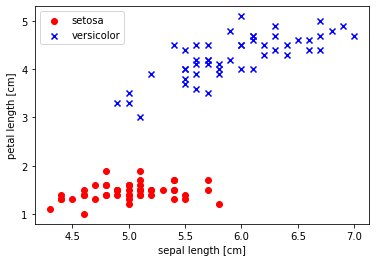

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

## Question 0. Manual Perceptron Training 

Below you can see the first 5 data points of the data set, all labeled as 'setosa'. 

In [ ]:
X[0:5], y[0:5]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4]]), array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are w0=0.1, w1=0.2, w2=-0.1

In the following space (Double click this text), write the weights after processing data points 0,1,2, and show your calculations. Please a learning rate ($\eta = 0.1$) as shown in the textbook:

In [ ]:
eta = 0.1
w = np.array([0.1,0.2,-0.1])

In [ ]:
x1 = X[0][0]
x2 = X[0][1]
input = w[0] + w[1]*x1 +w[2]*x2
yhat = np.where(input >= 0.0, 1, -1)
w[0] += eta * (y[0] - yhat)
w[1] += eta * ((y[0] - yhat)*x1)
w[2] += eta * ((y[0] - yhat)*x2)
print("Updated weights: ", w)
z = w[0] + w[1]*x1 +w[2]*x2
print("z: ", z)

Updated weights:  [-0.1  -0.82 -0.38]
z:  -4.814


In [ ]:
x1 = X[1][0]
x2 = X[1][1]
input = w[0] + w[1]*x1 +w[2]*x2
yhat = np.where(input >= 0.0, 1, -1)
w[0] += eta * (y[0] - yhat)
w[1] += eta * ((y[0] - yhat)*x1)
w[2] += eta * ((y[0] - yhat)*x2)
print("Updated weights: ", w)
z = w[0] + w[1]*x1 +w[2]*x2
print("z: ", z)

Updated weights:  [-0.1  -0.82 -0.38]
z:  -4.65


In [ ]:
x1 = X[2][0]
x2 = X[2][1]
input = w[0] + w[1]*x1 +w[2]*x2
yhat = np.where(input >= 0.0, 1, -1)
w[0] += eta * (y[0] - yhat)
w[1] += eta * ((y[0] - yhat)*x1)
w[2] += eta * ((y[0] - yhat)*x2)
print("Updated weights: ", w)
z = w[0] + w[1]*x1 +w[2]*x2
print("z: ", z)

Updated weights:  [-0.1  -0.82 -0.38]
z:  -4.448


## Question 1. Perceptron Code Modification

The following code is the perceptron implementation from the textbook (with only three lines inserted).

In [ ]:
import numpy as np
import copy

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
        ##############################(ii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training
        self.iteration = 0
        


    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        # to save deep copy of weights
        self.wo_ = {}

        for i in range(self.n_iter):
            errors = 0
            # to save deep copy of weights
            self.wo_[i] = []
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
##############################(iii) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.
                #imported copy to save deepcopy of weights.
                #A deep copy constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original.
                self.wo_[i].append(copy.deepcopy(self.w_))
                errors += int(update != 0.0)
            self.errors_.append(errors)

 ############################# (i)  when errors are equal to zero, no more iterations/ fit so break out of the loop.         
            if errors == 0:
              self.iteration = i + 1
              break
               
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
ppn1 = Perceptron(eta=0.1)
ppn1.fit(X,y)
ppn1

In [ ]:
print(ppn1.wo_[0][0:3])
print(ppn1.iteration)

[array([ 0.01624345, -0.00611756, -0.00528172]), array([ 0.01624345, -0.00611756, -0.00528172]), array([ 0.01624345, -0.00611756, -0.00528172])]
6


 
Work on the above cell and modify the code so that:

(i) The fit function stops when no more iterations are necessary. <br>
(ii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training <br>
(iii) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

To modify the code please insert your code with clear comments surrounding it, similarly to "my do-nothing code". Make sure you evaluate the cell again,  so that following cells will be using the modified perceptron.



## Question2: Experimenting with hyperparameters

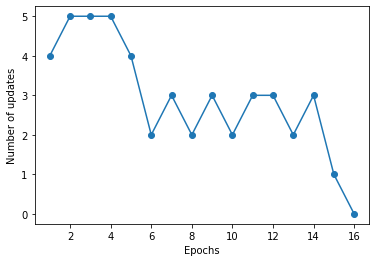

16

In [ ]:
ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()
ppn.iteration

Running the above code, you can verify if your modification in question 1 works correctly. The point of this question is to experiment with the different hyperparameters. Here are some specific questions:<br>
(i) Find the largest value of $\eta$ for which the process takes more than 20 iterations to converge. Explain how you found that $\eta$ <br>
(ii) Are you able to find $\eta>1$ for which the process fails to converge in less than 30 iterations? <br>
(iii) Find two different settings for the random state, that give different convergence patterns, for the same $\eta$. 

Please give your answers in the cell below. 

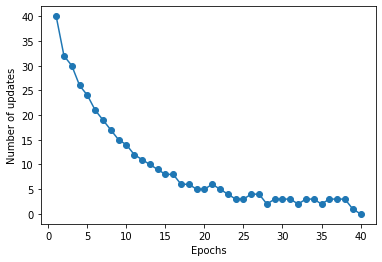

40

In [ ]:
ppn2 = Perceptron(eta=0.00001, n_iter=100, random_state=1)
ppn2.fit(X, y)
plt.plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
ppn2.iteration

In [ ]:
ppn3 = Perceptron(eta=0.00005, n_iter=100, random_state=1)
ppn3.fit(X, y)
print(ppn3.iteration)
ppn4 = Perceptron(eta=0.000049, n_iter=100, random_state=2)
ppn4.fit(X, y)
print(ppn4.iteration)

21
22


For eta=0.0001  it took iteration = 16 to converge.<br>
For eta=0.00001 it took iteration = 40 to converge.<br>

(i) Find the largest value of  η  for which the process takes more than 20 iterations to converge. Explain how you found that  η<br>
Since as number of zeros in decimal point increased the number of iteration also increased and based trial and error, found that eta = 0.00005 would largest value of  η  for which the process takes more than 20 iterations to converge.

In [ ]:
ppn5 = Perceptron(eta=1, n_iter=100, random_state=1)
ppn5.fit(X, y)
print(ppn5.iteration)
ppn6 = Perceptron(eta=2, n_iter=100, random_state=1)
ppn6.fit(X, y)
print(ppn6.iteration)

6
6


(ii) Are you able to find  η>1  for which the process fails to converge in less than 30 iterations?<br>
η>1 converges in 6 iterations. If the training set is linearly separable, then the perceptron is guaranteed to converge. Process failing to converge would **not depend on *eta*  values**, So would not be able to find  η>1 for which the process fails to converge in less than 30 iterations.

In [ ]:
#(iii) Find two different settings for the random state, that give different convergence patterns, for the same  η .
ppn7 = Perceptron(eta=0.001, n_iter=100, random_state=1)
ppn7.fit(X, y)
print(ppn7.errors_)
print(ppn7.iteration)
ppn8 = Perceptron(eta=0.001, n_iter=100, random_state=2)
ppn8.fit(X, y)
print(ppn8.errors_)
print(ppn8.iteration)
print(np.array_equal(ppn7.errors_, ppn8.errors_))

[1, 3, 2, 3, 1, 0]
6
[1, 2, 3, 2, 3, 1, 0]
7
False


(iii) Find two different settings for the random state, that give different convergence patterns, for the same  η .<br>
For same eta values, eta=0.001 giving different random states 1, 2 yield **different convergence pattern**. Hence different errors_ values and comparing if two errors_ arrays are equal yield *False*

## Question 3: Visualizing multiple decision regions over time 

Here is the function for visualizing decision regions

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

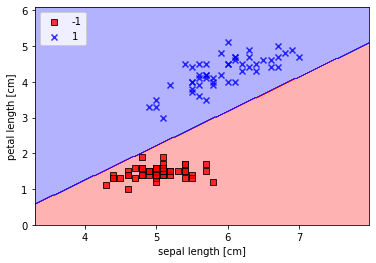

In [ ]:
ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)
ppn.fit(X, y)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 5 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

Iteration:  1


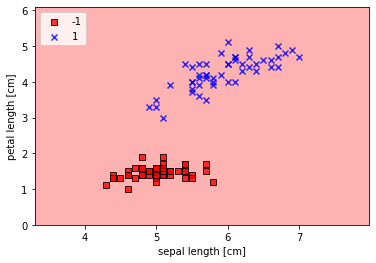

Iteration:  2


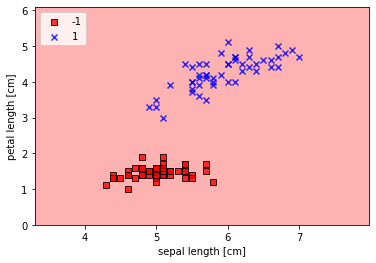

Iteration:  3


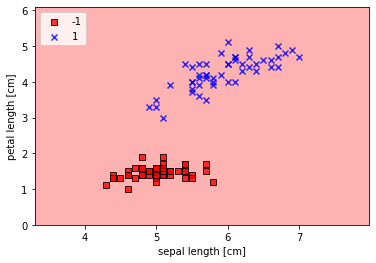

Iteration:  4


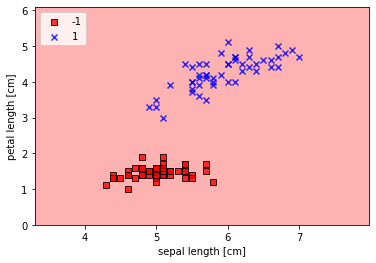

Iteration:  5


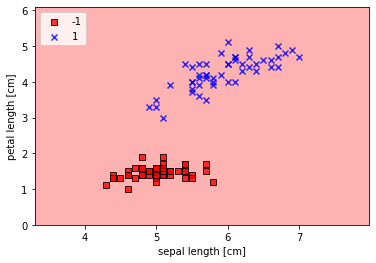

Iteration:  6


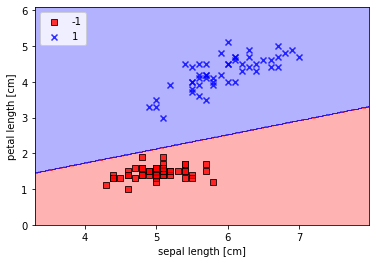

In [ ]:
for i in range(0,6):
  ppn9 = Perceptron(eta= 0.01,n_iter=i, random_state=1)
  ppn9.fit(X, y)
  print("Iteration: ",i+1)
  plot_decision_regions(X, y, classifier=ppn9)
  plt.xlabel('sepal length [cm]')
  plt.ylabel('petal length [cm]')
  plt.legend(loc='upper left')
  # plt.savefig('images/02_08.png', dpi=300)
  plt.show()
  
#

## Question 4: Changing the data order in training

The data arrays (X,y) currently in the memory are organized so that the all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X,y). In this question we will check the impact of changing the order of the data in the number of iterations required to learn a correct perceptron. 


The commented code below needs a small change in order to generate a random shuffle (also called permutation) of the data). Please look up the particular functions of the code, see how they work and then do the required modification and uncomment/evaluate the code. 

In [ ]:
# establish a random shuffle
s = np.arange(len(y))
np.random.shuffle(s)
# shuffle sample
X_shuffle = X[s]
y_shuffle = y[s]


Modify the code below as follows: <br>
(i) Pick a sufficiently small $\eta$ so that convergences takes 20 iterations or more <br>
(ii) Add an extra line that fits the perceptron on the shuffled data <br>
(iii) Plot the error for both training processes (the original, and the shuffled ata) 

What do you observe?

[40, 32, 30, 26, 24, 21, 19, 17, 15, 14, 12, 11, 10, 9, 8, 8, 6, 6, 5, 5, 6, 5, 4, 3, 3, 4, 4, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 1, 0]


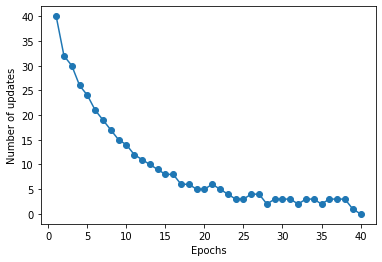

X and y data iteration:  40


In [ ]:
#(i) Pick a sufficiently small  η  so that convergences takes 20 iterations or more
ppn10 = Perceptron(eta= 0.00001)
ppn10.fit(X, y)
print(ppn10.errors_)
plt.plot(range(1, len(ppn10.errors_) + 1), ppn10.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()
print("X and y data iteration: ",ppn10.iteration)

(iii) Plot the error for both training processes (the original, and the shuffled data)

[65, 81, 67, 44, 27, 19, 13, 11, 10, 8, 6, 5, 6, 5, 3, 3, 3, 0]


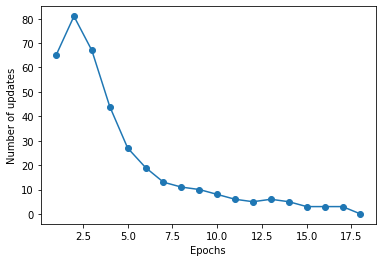

Shuffled X and Shuffled y data iteration:  18


In [ ]:
#(ii) Add an extra line that fits the perceptron on the shuffled data

ppn10.fit(X_shuffle, y_shuffle)
print(ppn10.errors_)
plt.plot(range(1, len(ppn10.errors_) + 1), ppn10.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()
print("Shuffled X and Shuffled y data iteration: ", ppn10.iteration)

**For eta values remaining same, number of iterations are almost halved. Shuffled data of both class helps perceptron to learn faster that is with less iteration adjusting weights.**

#Question 5: Understanding linear transformations

Suppose we have a 2-dimensional data set. Then we transform each data point $x^{(j)} = (x_1^{(j)}, x_2^{(j)})$ as follows: $\tilde{x^{(j)}} = ( a x_1^{(j)}- c, b x_2^{(j)}-c)$, where $a,b,c$ are constant numbers. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data. 


If our given data set is linearly separable, is the same true for the transformed one? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a, b, c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set?

In [ ]:
#assigning random values for a, b, c. Use of randint(random integer) is okay.
a = 3
b = 4
c = 5

In [ ]:
X[0:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [ ]:
# Linear change to X
# This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.
X1 = np.array(a*X[:,0] - c)
X2 = np.array(b*X[:,1] - c)
X_Linear = np.stack((X1,X2), axis=-1)
X_Linear[0:5]

array([[10.3,  0.6],
       [ 9.7,  0.6],
       [ 9.1,  0.2],
       [ 8.8,  1. ],
       [10. ,  0.6]])

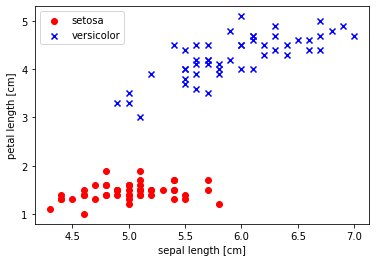

In [ ]:
#Visually seeing if data after linear transformation is still linearlly separable.
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X_Linear = X_Linear[0:100]

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

Visually data after linear transformation is still linearly separable. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data. Still 2 dimensional data. <br>
**If our given data set is linearly separable, it is the same true for the transformed one.**

But you should also try and justify your answer in a theoretical way: if there exists a 'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set?

In [ ]:
ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)
ppn.fit(X, y)
#weights for the perceptron that works on the original data set
print("Original data weights: ", ppn.w_)
ppn.fit(X_Linear, y)
#weights for the perceptron that works on the transformed data set
print("Transformed data weights: ", ppn.w_)

Original data weights:  [ 0.01484345 -0.00547756  0.00567828]
Transformed data weights:  [ 0.01624345 -0.00293756  0.00247828]


Please Note:

The x and y axis scale for original data is different for transformed data.


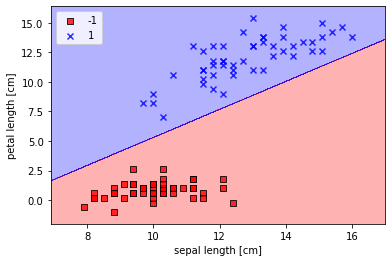

In [ ]:
plot_decision_regions(X_Linear, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In theory, a line is represented using the equation 

> y = mx + c ; m is the slope, c is constant

Here <br>a  = 3<br> b = 4<br> c = 5

- original data<br>x = (x1, x2)<br>
z = w0 + w1x1 + w2x2
- transformed data <br>x = (3x1 - 5, 4x2 - 5) <br>
z = w0 + w1(3x1 - 5) + w2(4x2 - 5)

In [ ]:
# Grader's area
rawScore = sum(score.__dict__.values())
possibleScore = max(len(score.__dict__.keys())*4,1)
rescaledScore = rawScore*100/possibleScore
print(rescaledScore)

0.0
